<a href="https://colab.research.google.com/github/rajeshkumar-niet/Machine_Learning/blob/main/Models/Building_Models_From_Scretch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

### Model

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
class Linear_Regression:
    def __init__(self, learning_rate, no_of_iterations):
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations

    def fit(self, X, Y):
        # number of training example and features
        self.m, self.n = X.shape
        # Weight and bias
        self.W = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.Y = Y

        # Gradient descent
        for i in range(self.no_of_iterations):
            self.update_weights()

    def update_weights(self):
        Y_prediction = self.predict(self.X)
        # Gradient descent
        dw = (-2 * (self.X.T).dot(self.Y - Y_prediction)) / self.m
        db = -2 * np.sum(self.Y - Y_prediction)/self.m
        # Update weights
        self.W = self.W - self.learning_rate * dw
        self.b = self.b - self.learning_rate * db

    def predict(self,X):
        return X.dot(self.W) + self.b


### Data Preprocessing

In [ ]:
# Importing dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [ ]:
# Data preprocessing
data = pd.read_csv('/content/salary_dataM3.csv')
data.head()
data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [ ]:
data.shape

(30, 2)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [ ]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [ ]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

### Trianing Model

In [ ]:
# Train test split
X = data.iloc[:, :-1].values
Y = data.iloc[:, 1].values
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size = 0.33, random_state = 2)

In [ ]:
model = Linear_Regression( 0.01, 1000)
model.fit(X_train, Y_train)

In [ ]:
# Weigth and bias
print("Model Weigth is ",model.W)
print("Model Bias is ",model.b)

Model Weigth is  [9580.3011966]
Model Bias is  23226.38946603212


In [ ]:
test_data_prediction = model.predict(X_test)
print(test_data_prediction)

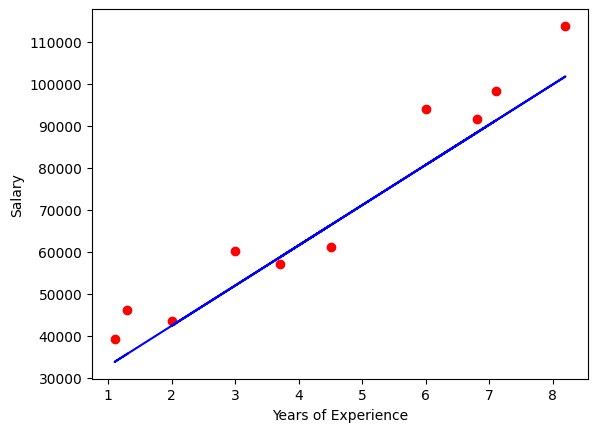

In [ ]:
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_test, test_data_prediction, color='blue')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# Logistic Regression

###Model

In [ ]:
import numpy as np

In [ ]:
class Logistic_Regression():
    def __init__(self, learning_rate, number_of_iteration) :
        self.learning_rate = learning_rate
        self.number_of_iteration = number_of_iteration

    def fit(self, X, Y):
        self.m, self.n = X.shape
        self.W = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.Y = Y
        for i in range(self.number_of_iteration):
            self.update_weights()

    def update_weights(self):

        # Sigmoid function
        Y_hat = 1 / (1 + np.exp(-(self.X.dot(self.W) + self.b)))

        # Gradient descent
        dw = (1 / self.m) * np.dot(self.X.T, (Y_hat - self.Y))
        db = (1 / self.m) * np.sum(Y_hat - self.Y)

        # Updating the weigths and bias
        self.W = self.W - self.learning_rate * dw
        self.b = self.b - self.learning_rate * db


    def predict(self, X):
        Y_pred = 1 / (1 + np.exp(-(X.dot(self.W) + self.b)))
        Y_pred = np.where(Y_pred > 0.5, 1, 0)
        return Y_pred


### Data Preprocessing

In [ ]:
# Importing dependencies
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('/content/diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
dataset.shape

(768, 9)

In [ ]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [ ]:
dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
features = dataset.drop(columns = 'Outcome', axis = 1)
target = dataset['Outcome']

### Model Fitting

In [ ]:
# Data standardization
scaler = StandardScaler()
scaler.fit(features)
standardized_data = scaler.transform(features)
features = standardized_data

In [ ]:
# Data spliting
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size = 0.25, random_state = 2)

In [ ]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(576, 8) (192, 8) (576,) (192,)


In [ ]:
model = Logistic_Regression(0.01,1000)

In [ ]:
model.fit(X_train, Y_train)

In [ ]:
# Accuracy scale
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print(X_train_prediction.shape, Y_train.shape)
print('Accuracy score of the training data : ', training_data_accuracy)

(576,) (576,)
Accuracy score of the training data :  0.7760416666666666


In [ ]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7708333333333334


### Prediction System

In [ ]:
input_data = (6, 148, 72, 35, 0, 33.6, 0.627, 50)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
std_data = scaler.transform(input_data_reshaped)
print(std_data)

[[ 0.63994726  0.84832379  0.14964075  0.90726993 -0.69289057  0.20401277
   0.46849198  1.4259954 ]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
prediction = model.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


# SVM (Support Vector Machine )

### Model

In [ ]:
import numpy as np

class SVM_classifier():


  # initiating the hyperparameters
  def __init__(self, learning_rate, no_of_iterations, lambda_parameter):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations
    self.lambda_parameter = lambda_parameter



  # fitting the dataset to SVM Classifier
  def fit(self, X, Y):

    # m  --> number of Data points --> number of rows
    # n  --> number of input features --> number of columns
    self.m, self.n = X.shape

    # initiating the weight value and bias value

    self.w = np.zeros(self.n)

    self.b = 0

    self.X = X

    self.Y = Y

    # implementing Gradient Descent algorithm for Optimization

    for i in range(self.no_of_iterations):
      self.update_weights()



  # function for updating the weight and bias value
  def update_weights(self):

    # label encoding
    y_label = np.where(self.Y <= 0, -1, 1)



    # gradients ( dw, db)
    for index, x_i in enumerate(self.X):

      condition = y_label[index] * (np.dot(x_i, self.w) - self.b) >= 1

      if (condition == True):

        dw = 2 * self.lambda_parameter * self.w
        db = 0

      else:

        dw = 2 * self.lambda_parameter * self.w - np.dot(x_i, y_label[index])
        db = y_label[index]


      self.w = self.w - self.learning_rate * dw

      self.b = self.b - self.learning_rate * db



  # predict the label for a given input value
  def predict(self, X):

    output = np.dot(X, self.w) - self.b

    predicted_labels = np.sign(output)

    y_hat = np.where(predicted_labels <= -1, 0, 1)

    return y_hat



### Data Preprocessing

In [ ]:
# importing dependecies
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
dataset = pd.read_csv('/content/diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
features = dataset.drop(columns = 'Outcome', axis = 1)
taget = dataset['Outcome']

In [ ]:
print(features.shape, taget.shape)

(768, 8) (768,)


In [ ]:
scaler = StandardScaler()
scaler.fit(features)
standardized_data = scaler.transform(features)

In [ ]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [ ]:
X_train, X_test, Y_train, Y_test= train = train_test_split(
     standardized_data, taget, test_size = 0.25, random_state = 2)


In [ ]:
print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)
print("Y_train shape", Y_train.shape)
print("Y_test shape", Y_test.shape)

X_train shape (576, 8)
X_test shape (192, 8)
Y_train shape (576,)
Y_test shape (192,)


### Training the  Model

In [ ]:
classifier = SVM_classifier(learning_rate=0.001, no_of_iterations=1000, lambda_parameter=0.01)

In [ ]:
classifier.fit(X_train, Y_train)

In [ ]:
Y_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, Y_train_prediction)
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7760416666666666


In [ ]:
Y_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, Y_test_prediction)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7604166666666666


###Predictive System

In [ ]:
input = (1,89,76,34,37,31.2,0.192,23)

input_data_as_numpy_array = np.asarray(input)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
std_data = scaler.transform(input_data_reshaped)
# print(std_data)
prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[0]
The person is not diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# LASSO Regression

### Model

In [1]:
import numpy as np
class Lasso_Regression():
    def __init__(self, learning_rate, no_of_iterations, lambda_parameter):
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations
        self.lambda_parameter = lambda_parameter

    def fit(self, X, Y):
        self.m, self.n = X.shape
        self.w = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.Y = Y
        for i in range(self.no_of_iterations):
            self.update_weights()

    def update_weights(self):
        Y_prediction = self.predict(self.X)
        dw = np.zeros(self.n)
        for i in range(self.n):
            if self.w[i]>0:
                dw  = ((-2)*(self.X[:,i].dot(self.Y-Y_prediction)+self.lambda_parameter)/self.m)
            else:
                dw  = ((-2)*(self.X[:,i].dot(self.Y-Y_prediction)-self.lambda_parameter)/self.m)
        db = (-2)*np.sum(self.Y-Y_prediction)/self.m
        self.w = self.w - self.learning_rate*dw
        self.b = self.b - self.learning_rate*db

    def predict(self, X):
        return X.dot(self.w) + self.b

### Data Preprocessing

In [2]:
#  importing the dependencies
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics

In [4]:
dataset = pd.read_csv('/content/salary_data.csv')

In [5]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [7]:
dataset.tail()
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [8]:
dataset.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [9]:
features = dataset.iloc[:,:-1].values
target = dataset.iloc[:,1].values

### Training Model

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.33, random_state = 2)

In [11]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(20, 1) (10, 1) (20,) (10,)


In [12]:
model = Lasso_Regression(learning_rate = 0.02, no_of_iterations=1000,lambda_parameter=200)
model.fit(X_train, Y_train)

In [13]:
test_data_prediction = model.predict(X_test)

In [14]:
from sklearn import metrics
score_1 = metrics.r2_score(Y_test, test_data_prediction)
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)
print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.9041133321176933
Mean Absolute Error :  6676.758569450959


### Predictive System

In [24]:
input = (3.2)
input = np.asarray(input)
input = input.reshape(1,-1)
prediction = model.predict(input)
print(prediction)

[54140.28929921]
